<a href="https://colab.research.google.com/github/lucianodevmobile123/MobileDev/blob/main/LPN_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Upload do CSV
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# 2. Leitura do CSV
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# 3. Visualização inicial
print("Amostra dos dados:")
print(df.head())

# Verificação de idiomas presentes
print("\nIdiomas únicos e contagem:")
print(df['lang'].value_counts())
print(f"Total de idiomas únicos: {df['lang'].nunique()}")


Saving detect_language_dataset_expanded_clean_fixed.csv to detect_language_dataset_expanded_clean_fixed.csv
Amostra dos dados:
                       text lang
0  Ich liebe programmieren.   de
1  Ich liebe programmieren.   de
2  Ich liebe programmieren.   de
3  Ich liebe programmieren.   de
4             Guten Morgen!   de

Idiomas únicos e contagem:
lang
ja      50
zh      49
de      35
es      35
en      35
it      35
fr      35
ko      35
pt      35
ru      35
lang     4
Name: count, dtype: int64
Total de idiomas únicos: 11


In [2]:
# 4. Pré-processamento e Vetorização
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

texts = df['text'].astype(str)   # Garante que é string
labels = df['lang'].astype(str)  # Garante que é string

# Vetorizador baseado em n-gramas de caracteres (ideal para detecção de idioma)
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
x = vectorizer.fit_transform(texts).toarray()
y = labels.values

# 5. Separação treino/teste
train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size=0.4, stratify=y, random_state=42
)


print("Vetorização e divisão de dados concluídas!")


Vetorização e divisão de dados concluídas!


In [3]:
# 6. Treinamento com Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_x, train_y)

print("Modelo treinado com sucesso!")


Modelo treinado com sucesso!


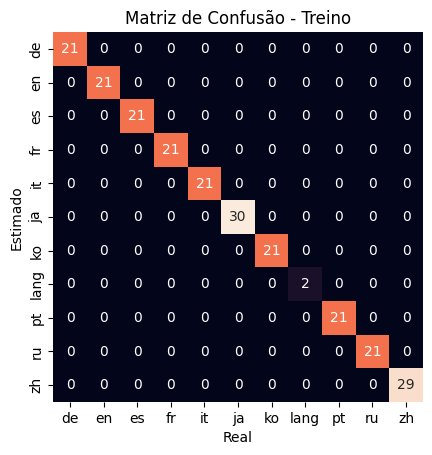

Relatório (Treino):
               precision    recall  f1-score   support

          de       1.00      1.00      1.00        21
          en       1.00      1.00      1.00        21
          es       1.00      1.00      1.00        21
          fr       1.00      1.00      1.00        21
          it       1.00      1.00      1.00        21
          ja       1.00      1.00      1.00        30
          ko       1.00      1.00      1.00        21
        lang       1.00      1.00      1.00         2
          pt       1.00      1.00      1.00        21
          ru       1.00      1.00      1.00        21
          zh       1.00      1.00      1.00        29

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229

Acurácia (Treino): 1.0




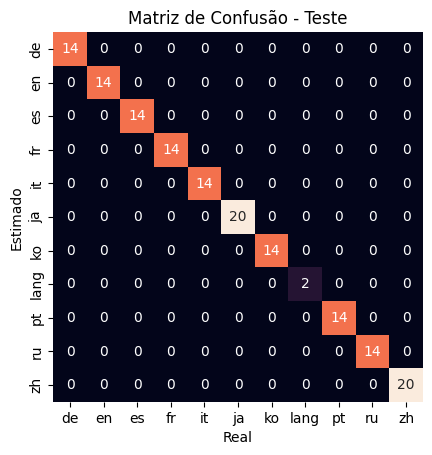

Relatório (Teste):
               precision    recall  f1-score   support

          de       1.00      1.00      1.00        14
          en       1.00      1.00      1.00        14
          es       1.00      1.00      1.00        14
          fr       1.00      1.00      1.00        14
          it       1.00      1.00      1.00        14
          ja       1.00      1.00      1.00        20
          ko       1.00      1.00      1.00        14
        lang       1.00      1.00      1.00         2
          pt       1.00      1.00      1.00        14
          ru       1.00      1.00      1.00        14
          zh       1.00      1.00      1.00        20

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Acurácia (Teste): 1.0




In [4]:
# 7. Avaliação do Modelo
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def avaliar_modelo(model, x, y, nome_conjunto="Teste"):
    pred = model.predict(x)
    mat = confusion_matrix(y, pred, labels=model.classes_)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Matriz de Confusão - {nome_conjunto}")
    plt.xlabel('Real')
    plt.ylabel('Estimado')
    plt.show()

    print(f"Relatório ({nome_conjunto}):\n", classification_report(y, pred))
    print(f"Acurácia ({nome_conjunto}):", accuracy_score(y, pred))
    print("\n")

# Avaliação no conjunto de treino
avaliar_modelo(model, train_x, train_y, nome_conjunto="Treino")

# Avaliação no conjunto de teste
avaliar_modelo(model, test_x, test_y, nome_conjunto="Teste")
